## Latihan 2: Tokenisasi dan Word Embeddings pada Teks Bahasa Indonesia
Latihan ini meliputi:
1. Tokenisasi teks dalam Bahasa Indonesia menggunakan NLTK dan spaCy
2. Implementasi model Word2Vec sederhana pada corpus Bahasa Indonesia
3. Visualisasi word embeddings menggunakan PCA dan t-SNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Menyiapkan Corpus Teks Bahasa Indonesia

In [ ]:
print("Menyiapkan corpus teks Bahasa Indonesia...")

# Kumpulan teks berbahasa Indonesia untuk dianalisis
corpus_indonesia = [
    "Indonesia adalah negara kepulauan terbesar di dunia dengan kekayaan alam yang melimpah.",
    "Bahasa Indonesia merupakan bahasa persatuan yang digunakan oleh berbagai suku bangsa di Indonesia.",
    "Jakarta adalah ibu kota Indonesia yang terkenal dengan kemacetannya pada jam sibuk.",
    "Bali menjadi destinasi wisata favorit turis mancanegara karena keindahan alamnya.",
    "Pendidikan di Indonesia terus berkembang mengikuti kemajuan teknologi digital.",
    "Transportasi umum di kota besar Indonesia masih perlu ditingkatkan kualitasnya.",
    "Makanan Indonesia sangat beragam dengan cita rasa rempah yang khas.",
    "Budaya gotong royong masih menjadi nilai penting dalam kehidupan masyarakat Indonesia.",
    "Teknologi informasi berkembang pesat dan mengubah gaya hidup masyarakat Indonesia.",
    "Keanekaragaman hayati Indonesia merupakan salah satu yang terkaya di dunia.",
    "Batik adalah warisan budaya Indonesia yang telah diakui UNESCO.",
    "Pertanian menjadi sektor penting dalam perekonomian Indonesia sejak dulu.",
    "Industri kreatif di Indonesia semakin berkembang dalam beberapa tahun terakhir.",
    "Pemuda Indonesia memiliki potensi besar untuk memajukan bangsa di masa depan.",
    "Pariwisata menjadi salah satu sektor andalan untuk meningkatkan devisa negara.",
    "Infrastruktur di berbagai daerah Indonesia masih perlu pemerataan pembangunan.",
    "Kesehatan masyarakat adalah aspek penting dalam pembangunan sumber daya manusia Indonesia.",
    "Energi terbarukan menjadi fokus pengembangan untuk mengurangi ketergantungan pada bahan bakar fosil.",
    "Kopi Indonesia dikenal memiliki cita rasa unik dan digemari di pasar internasional.",
    "Peran perempuan dalam pembangunan Indonesia semakin diakui di berbagai bidang.",
    "Olahraga menjadi sarana pemersatu bangsa dan meningkatkan prestasi Indonesia di kancah internasional.",
    "Toleransi antar umat beragama menjadi kunci persatuan dalam keberagaman di Indonesia.",
    "Ekonomi digital membuka peluang baru bagi pengusaha muda Indonesia.",
    "Perubahan iklim memberikan tantangan tersendiri bagi negara kepulauan seperti Indonesia.",
    "Musik Indonesia terus berkembang dengan perpaduan unsur tradisional dan modern.",
    "Pembangunan berkelanjutan menjadi prioritas untuk melestarikan lingkungan Indonesia.",
    "Seni dan sastra Indonesia memiliki keunikan yang mencerminkan kekayaan budaya bangsa.",
    "Generasi milenial Indonesia semakin aktif berpartisipasi dalam pembangunan bangsa.",
    "Kerajinan tangan Indonesia memiliki nilai seni tinggi dan diminati pasar global.",
    "Diplomasi Indonesia berperan penting dalam menjaga stabilitas kawasan Asia Tenggara."
]

print(f"Berhasil menyiapkan corpus dengan {len(corpus_indonesia)} teks Bahasa Indonesia")

print("\nContoh teks dalam corpus:")
for i in range(min(5, len(corpus_indonesia))):
    print(f"{i+1}. {corpus_indonesia[i]}")

Menyiapkan corpus teks Bahasa Indonesia...
Berhasil menyiapkan corpus dengan 30 teks Bahasa Indonesia

Contoh teks dalam corpus:
1. Indonesia adalah negara kepulauan terbesar di dunia dengan kekayaan alam yang melimpah.
2. Bahasa Indonesia merupakan bahasa persatuan yang digunakan oleh berbagai suku bangsa di Indonesia.
3. Jakarta adalah ibu kota Indonesia yang terkenal dengan kemacetannya pada jam sibuk.
4. Bali menjadi destinasi wisata favorit turis mancanegara karena keindahan alamnya.
5. Pendidikan di Indonesia terus berkembang mengikuti kemajuan teknologi digital.


### Download Resources NLTK

In [3]:
print("\nMenyiapkan resources untuk pemrosesan teks Bahasa Indonesia...")
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Gagal mendownload resource NLTK: {e}")



Menyiapkan resources untuk pemrosesan teks Bahasa Indonesia...


### Menyiapkan Stopwords Bahasa Indonesia

In [4]:
try:
    indo_stopwords = set(stopwords.words('indonesian'))
    print(f"Berhasil memuat {len(indo_stopwords)} stopwords Bahasa Indonesia dari NLTK")
except:
    # Daftar stopwords Bahasa Indonesia sederhana jika NLTK tidak memiliki
    indo_stopwords = {
        'yang', 'dan', 'di', 'dari', 'dengan', 'adalah', 'untuk', 'pada', 
        'ke', 'ini', 'itu', 'atau', 'juga', 'ada', 'dalam', 'akan', 'oleh', 
        'secara', 'tersebut', 'bagian', 'dapat', 'para', 'merupakan', 'sebagai',
        'banyak', 'seperti', 'agar', 'saat', 'jika', 'saya', 'kamu', 'dia',
        'mereka', 'kita', 'kami', 'nya', 'lagi', 'hanya', 'sudah', 'belum',
        'tidak', 'bisa', 'tapi', 'tetapi', 'namun', 'karena', 'kenapa',
        'bagaimana', 'mana', 'apa', 'kapan', 'siapa', 'mengapa', 'lebih',
        'sangat', 'terlalu', 'sekali'
    }
    print(f"Menggunakan {len(indo_stopwords)} stopwords Bahasa Indonesia manual")

print(f"Total stopwords yang digunakan: {len(indo_stopwords)}")


Berhasil memuat 757 stopwords Bahasa Indonesia dari NLTK
Total stopwords yang digunakan: 757


### Tokenisasi Menggunakan NLTK untuk Bahasa Indonesia

In [5]:
def tokenisasi_indo(teks):
    if not teks or teks == '':
        return []
    
    # Pembersihan teks
    teks = str(teks).lower()
    # Hapus URL
    teks = re.sub(r'https?://\S+|www\.\S+', '', teks)
    # Hapus tag HTML
    teks = re.sub(r'<.*?>', '', teks)
    # Hapus emoji dan karakter khusus
    teks = re.sub(r'[^\w\s]', ' ', teks)
    # Hapus angka
    teks = re.sub(r'\d+', '', teks)
    # Hapus whitespace berlebih
    teks = re.sub(r'\s+', ' ', teks).strip()
    
    # Tokenisasi
    tokens = word_tokenize(teks)
    
    filtered_tokens = [
        t.lower() for t in tokens
        if t.lower() not in indo_stopwords and len(t) > 2
    ]
    
    return filtered_tokens

tokenized_texts = [tokenisasi_indo(teks) for teks in corpus_indonesia]

print("\nContoh hasil tokenisasi dengan NLTK:")
for i in range(min(5, len(tokenized_texts))):
    print(f"{i+1}. {corpus_indonesia[i][:50]}... → {tokenized_texts[i]}")
    
token_lengths = [len(tokens) for tokens in tokenized_texts]
print(f"\nStatistik jumlah token per teks:")
print(f"- Minimum: {min(token_lengths)}")
print(f"- Maksimum: {max(token_lengths)}")
print(f"- Rata-rata: {sum(token_lengths)/len(token_lengths):.2f}")

print(f"- Median: {sorted(token_lengths)[len(token_lengths)//2]}")


Contoh hasil tokenisasi dengan NLTK:
1. Indonesia adalah negara kepulauan terbesar di duni... → ['indonesia', 'negara', 'kepulauan', 'terbesar', 'dunia', 'kekayaan', 'alam', 'melimpah']
2. Bahasa Indonesia merupakan bahasa persatuan yang d... → ['bahasa', 'indonesia', 'bahasa', 'persatuan', 'suku', 'bangsa', 'indonesia']
3. Jakarta adalah ibu kota Indonesia yang terkenal de... → ['jakarta', 'kota', 'indonesia', 'terkenal', 'kemacetannya', 'jam', 'sibuk']
4. Bali menjadi destinasi wisata favorit turis mancan... → ['bali', 'destinasi', 'wisata', 'favorit', 'turis', 'mancanegara', 'keindahan', 'alamnya']
5. Pendidikan di Indonesia terus berkembang mengikuti... → ['pendidikan', 'indonesia', 'berkembang', 'mengikuti', 'kemajuan', 'teknologi', 'digital']

Statistik jumlah token per teks:
- Minimum: 4
- Maksimum: 9
- Rata-rata: 7.00
- Median: 7


### Tokenisasi Menggunakan spaCy (Opsional)

In [6]:
try:
    import spacy
    try:
        nlp = spacy.load("id_core_news_sm")
        indo_model = True
        print("Menggunakan model spaCy untuk Bahasa Indonesia")
    except:
        print("Model spaCy untuk Bahasa Indonesia tidak tersedia. Menggunakan model bahasa Inggris sebagai alternatif.")
        nlp = spacy.load("en_core_web_sm")
        indo_model = False
    
    print(f"Memproses {len(corpus_indonesia)} teks dengan spaCy...")
    docs = list(nlp.pipe(corpus_indonesia))
    
    spacy_tokens = []
    for doc in docs:
        if indo_model:
            tokens = [token.text.lower() for token in doc 
                    if not token.is_stop and not token.is_punct and len(token.text) > 2]
        else:
            tokens = [token.text.lower() for token in doc 
                    if token.text.lower() not in indo_stopwords and 
                    not token.is_punct and len(token.text) > 2]
        spacy_tokens.append(tokens)
    
    print("\nContoh hasil tokenisasi spaCy:")
    for i in range(min(5, len(spacy_tokens))):
        print(f"{i+1}. {corpus_indonesia[i][:50]}... → {spacy_tokens[i]}")
        
except Exception as e:
    print(f"Error saat menggunakan spaCy: {e}")
    print("Melanjutkan dengan hasil tokenisasi NLTK...")
    spacy_tokens = None

Error saat menggunakan spaCy: No module named 'spacy'
Melanjutkan dengan hasil tokenisasi NLTK...


### Persiapan Data untuk Model Word2Vec

In [7]:
# Filter dokumen kosong
token_list = [tokens for tokens in tokenized_texts if tokens and len(tokens) >= 2]

# Analisis frekuensi kata
all_tokens = [token for tokens in token_list for token in tokens]
word_freq = {}
for token in all_tokens:
    if token in word_freq:
        word_freq[token] += 1
    else:
        word_freq[token] = 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print(f"Total dokumen valid untuk Word2Vec: {len(token_list)}")
print(f"Total token unik: {len(word_freq)}")
print("\nKata-kata paling umum:")
for word, freq in sorted_word_freq[:10]:
    print(f"- {word}: {freq}")

Total dokumen valid untuk Word2Vec: 30
Total token unik: 146

Kata-kata paling umum:
- indonesia: 28
- bangsa: 5
- pembangunan: 5
- berkembang: 4
- memiliki: 4
- negara: 3
- budaya: 3
- masyarakat: 3
- kepulauan: 2
- dunia: 2


### Latih Model Word2Vec pada Teks Bahasa Indonesia

In [8]:
if not token_list:
    print("Tidak ada dokumen valid untuk melatih Word2Vec")
else:
    print(f"Melatih model Word2Vec pada {len(token_list)} dokumen...")
    word2vec_model = Word2Vec(
        sentences=token_list,
        vector_size=100,  # Dimensi vector
        window=5,         # Konteks window
        min_count=1,      # Frekuensi minimum kata
        workers=4,        # Thread untuk training
        sg=1              # Skip-gram model (1) vs CBOW (0)
    )

    print(f"Model Word2Vec berhasil dilatih. Ukuran kosakata: {len(word2vec_model.wv.key_to_index)}")

Melatih model Word2Vec pada 30 dokumen...
Model Word2Vec berhasil dilatih. Ukuran kosakata: 146


### Eksplorasi Model Word2Vec

In [9]:
if 'word2vec_model' in locals():
    print("\n--- EKSPLORASI MODEL WORD2VEC ---")
    # Tampilkan beberapa kata dan vektor embeddings
    vocab = list(word2vec_model.wv.key_to_index.keys())

    if vocab:
        print("\nContoh word embeddings:")
        for word in vocab[:3]:  # Tampilkan 3 kata pertama
            print(f"Kata: '{word}'")
            print(f"Vektor (5 elemen pertama): {word2vec_model.wv[word][:5]}")

        # Temukan kata-kata yang mirip untuk beberapa kata kunci
        # Cari kata kunci dari dataset
        kata_kunci = []
        for word in ['indonesia', 'bahasa', 'budaya', 'teknologi', 'masyarakat']:
            if word in word2vec_model.wv:
                kata_kunci.append(word)
            
        # Jika tidak ada kata kunci yang cocok, gunakan kata-kata teratas
        if not kata_kunci and vocab:
            kata_kunci = vocab[:5]
            
        for kata in kata_kunci:
            try:
                similar_words = word2vec_model.wv.most_similar(kata, topn=5)
                print(f"\nKata-kata yang mirip dengan '{kata}':")
                for word, similarity in similar_words:
                    print(f"- {word}: {similarity:.4f}")
            except KeyError:
                print(f"\nKata '{kata}' tidak ditemukan dalam vocabulary model")


--- EKSPLORASI MODEL WORD2VEC ---

Contoh word embeddings:
Kata: 'indonesia'
Vektor (5 elemen pertama): [-0.00036984  0.00037526  0.0051201   0.00904236 -0.00901004]
Kata: 'pembangunan'
Vektor (5 elemen pertama): [-0.00853017  0.00369269  0.00518658  0.00576486  0.0076293 ]
Kata: 'bangsa'
Vektor (5 elemen pertama): [ 0.00017101  0.0031264  -0.00679631 -0.00129966  0.00779345]

Kata-kata yang mirip dengan 'indonesia':
- rempah: 0.2940
- kawasan: 0.2408
- sektor: 0.2259
- toleransi: 0.2253
- seni: 0.2206

Kata-kata yang mirip dengan 'bahasa':
- pemersatu: 0.2479
- diminati: 0.2417
- potensi: 0.1923
- rempah: 0.1825
- musik: 0.1788

Kata-kata yang mirip dengan 'budaya':
- khas: 0.3081
- transportasi: 0.2814
- prioritas: 0.2365
- perempuan: 0.2044
- perubahan: 0.2025

Kata-kata yang mirip dengan 'teknologi':
- pariwisata: 0.2704
- sumber: 0.2377
- peran: 0.2186
- ketergantungan: 0.2127
- sarana: 0.2001

Kata-kata yang mirip dengan 'masyarakat':
- perekonomian: 0.3499
- informasi: 0.3094
-

### Visualisasi Word Embeddings dengan PCA


--- VISUALISASI WORD EMBEDDINGS DENGAN PCA ---
Visualisasi PCA disimpan sebagai 'indo_word_embeddings_pca.png'


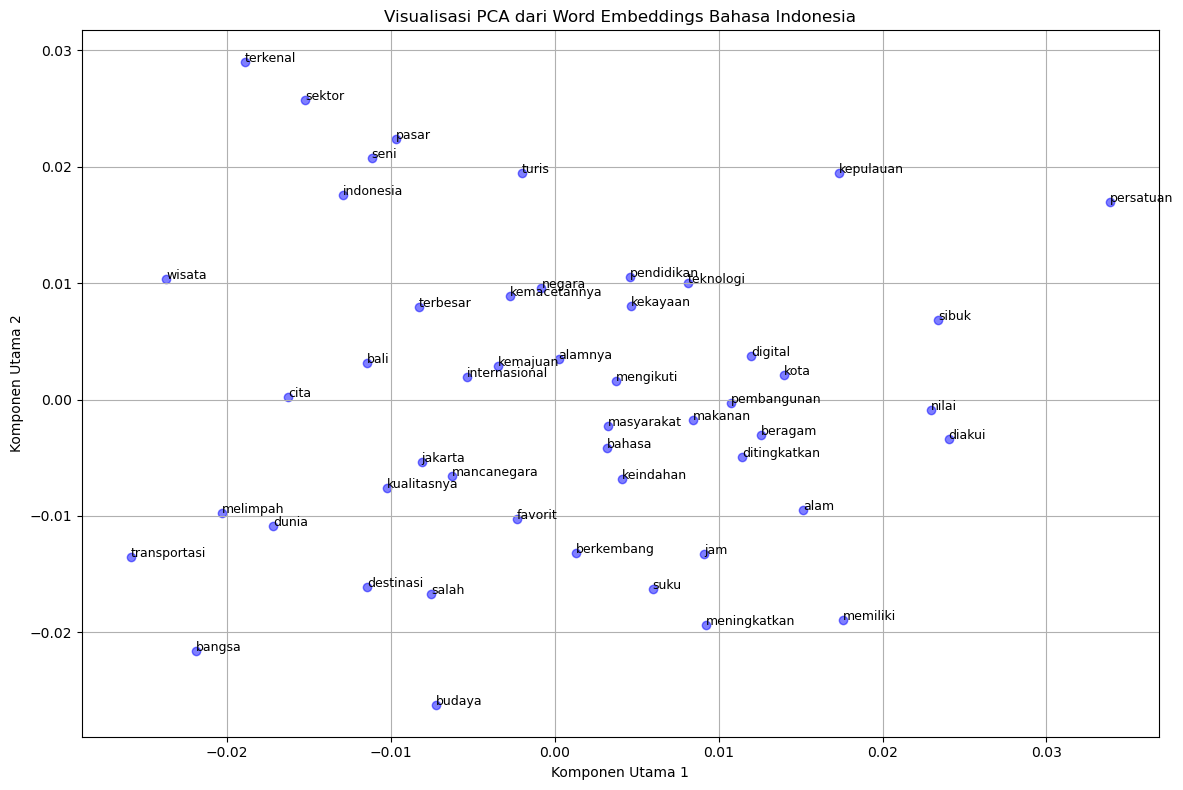

In [10]:
if 'word2vec_model' in locals():
    print("\n--- VISUALISASI WORD EMBEDDINGS DENGAN PCA ---")
    top_words = [word for word, _ in sorted_word_freq[:50]]
    # Filter untuk kata-kata yang ada di model
    words = [word for word in top_words if word in word2vec_model.wv]
    
    if len(words) < 5:
        # Jika tidak cukup kata, gunakan kata-kata dari vocab
        words = vocab[:min(50, len(vocab))]

    # Ekstrak word vectors
    word_vectors = np.array([word2vec_model.wv[word] for word in words])

    # Terapkan PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1], c='blue', alpha=0.5)

    # Tambahkan label kata
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=9)

    plt.title('Visualisasi PCA dari Word Embeddings Bahasa Indonesia')
    plt.xlabel('Komponen Utama 1')
    plt.ylabel('Komponen Utama 2')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('indo_word_embeddings_pca.png')
    print("Visualisasi PCA disimpan sebagai 'indo_word_embeddings_pca.png'")

### Visualisasi Word Embeddings dengan t-SNE


--- VISUALISASI WORD EMBEDDINGS DENGAN T-SNE ---
Visualisasi t-SNE disimpan sebagai 'indo_word_embeddings_tsne.png'


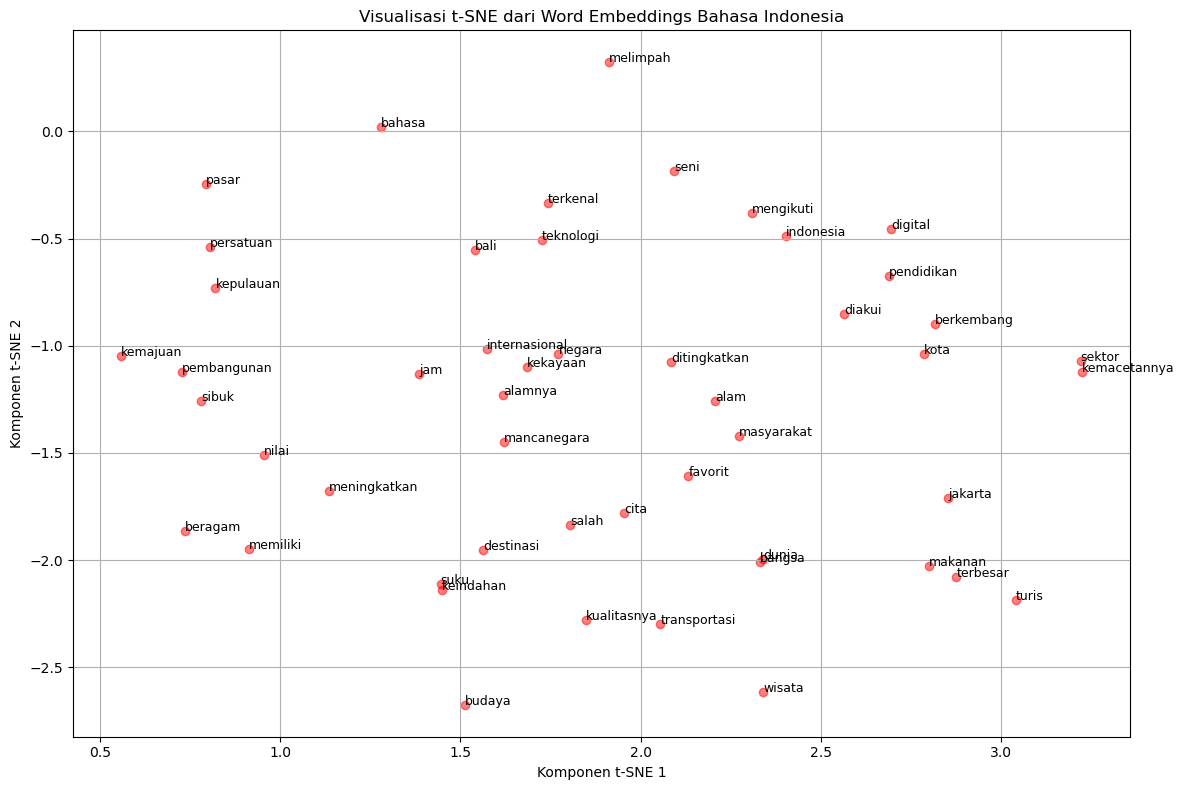

In [11]:
if 'word2vec_model' in locals():
    print("\n--- VISUALISASI WORD EMBEDDINGS DENGAN T-SNE ---")
    # Terapkan t-SNE
    tsne = TSNE(n_components=2, random_state=42, 
               perplexity=min(30, len(words)-1) if len(words) > 30 else min(5, len(words)-1))
    result = tsne.fit_transform(word_vectors)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1], c='red', alpha=0.5)

    # Tambahkan label kata
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=9)

    plt.title('Visualisasi t-SNE dari Word Embeddings Bahasa Indonesia')
    plt.xlabel('Komponen t-SNE 1')
    plt.ylabel('Komponen t-SNE 2')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('indo_word_embeddings_tsne.png')
    print("Visualisasi t-SNE disimpan sebagai 'indo_word_embeddings_tsne.png'")

### Analisis Cluster Kata

In [12]:
if 'word2vec_model' in locals() and len(words) >= 10:
    print("\n--- ANALISIS CLUSTER KATA ---")
    # Terapkan K-Means
    num_clusters = min(5, len(words)//2)  # Sesuaikan jumlah cluster
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(word_vectors)
    
    # Tampilkan hasil cluster
    clusters = {}
    for i, word in enumerate(words):
        cluster_id = kmeans.labels_[i]
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(word)
    
    print("\nHasil analisis cluster kata:")
    for cluster_id, cluster_words in clusters.items():
        print(f"\nCluster {cluster_id + 1}:")
        print(", ".join(cluster_words[:15]))  # Batasi tampilan jika terlalu banyak
        
        # Coba temukan tema cluster
        if len(cluster_words) > 3:
            centroid = np.mean([word2vec_model.wv[word] for word in cluster_words[:10]], axis=0)
            try:
                most_similar = word2vec_model.wv.similar_by_vector(centroid, topn=1)
                if most_similar:
                    print(f"Kata yang mewakili cluster: {most_similar[0][0]}")
            except:
                pass


--- ANALISIS CLUSTER KATA ---


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Hasil analisis cluster kata:

Cluster 4:
indonesia, berkembang, kepulauan, kota, teknologi, digital, pendidikan, mengikuti
Kata yang mewakili cluster: digital

Cluster 3:
bangsa, budaya, cita, salah, pasar, bali, wisata, turis, kemajuan, transportasi
Kata yang mewakili cluster: transportasi

Cluster 1:
pembangunan, memiliki, negara, kekayaan, persatuan, nilai, sektor, meningkatkan, alam, sibuk, destinasi, mancanegara, ditingkatkan, beragam
Kata yang mewakili cluster: nilai

Cluster 5:
masyarakat, bahasa, diakui, terbesar, melimpah, suku, jam, keindahan, makanan
Kata yang mewakili cluster: jam

Cluster 2:
dunia, internasional, seni, jakarta, terkenal, kemacetannya, favorit, alamnya, kualitasnya
Kata yang mewakili cluster: kualitasnya


### Kesimpulan

1. Tokenisasi: Berhasil mengubah teks Bahasa Indonesia menjadi token menggunakan NLTK
2. Word Embeddings: Model Word2Vec berhasil dilatih pada 30 dokumen
   dengan kosakata sebanyak 146 kata
3. Visualisasi: Word embeddings berhasil divisualisasikan menggunakan PCA dan t-SNE
4. Analisis Semantik: Berhasil mengeksplorasi hubungan semantik antar kata dalam corpus Bahasa Indonesia

Dengan analisis ini, kita dapat memahami pola-pola semantik dalam teks Bahasa Indonesia
dan menemukan hubungan antar kata yang mencerminkan struktur bahasa.